import 

In [1]:
#2

import geemap
import os
import ee
import matplotlib.pyplot as plt
from geemap import cartoee
import cartopy.crs as ccrs
from sqlalchemy import false, true


geemap.ee_initialize()

In [2]:
#經緯度要到小數點後面一點 
#經緯度的數字要調好 不然圖片會有破損



lon = -114.2579
lat = 38.9275
start_year = 1984
end_year = 2012


Map = geemap.Map()
point = ee.Geometry.Point(lon, lat)
years = ee.List.sequence(start_year, end_year)


def get_best_image(year):
    start_date = ee.Date.fromYMD(year, 1, 1)
    end_date = ee.Date.fromYMD(year, 12, 31)
    image = (
        ee.ImageCollection("LANDSAT/LT05/C02/T1_TOA")
        .filterBounds(point)
        .filter(ee.Filter.calendarRange(3, 10, 'month'))#指定月份
        .filterDate(start_date, end_date)
        #.sort('CLOUD_COVER',true)
        .first()
        
    )
    return ee.Image(image)
collection = ee.ImageCollection(years.map(get_best_image))


vis_params = {"bands": ['B3', 'B2', 'B1'],#代表rbg
              "min": 0.0,
              "max": 0.4,
              #"gamma" : 2.0, #亮度
              
}


image = ee.Image(collection.first())

Map.addLayer(image, vis_params, 'First image')
Map.setCenter(lon, lat, 8)
#Map

顯示圖片

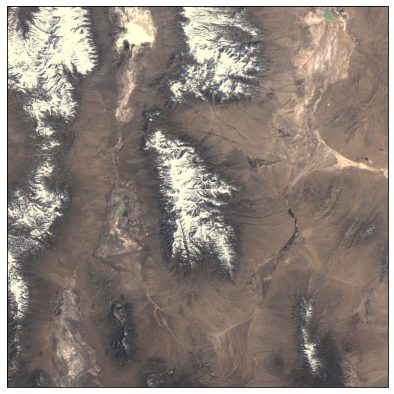

In [3]:
#設定範圍
w = 0.5
h = 0.5
region = [lon - w, lat - h, lon + w, lat + h]

fig = plt.figure(figsize=(10, 7))
ax = cartoee.get_map(image, region=region, vis_params=vis_params)
plt.show()

In [4]:
collection.aggregate_array('system:index').getInfo()

['LT05_039033_19840413',
 'LT05_039033_19850331',
 'LT05_039033_19860302',
 'LT05_039033_19870305',
 'LT05_039033_19880323',
 'LT05_039033_19890326',
 'LT05_039033_19900414',
 'LT05_039033_19910316',
 'LT05_039033_19920318',
 'LT05_039033_19930305',
 'LT05_039033_19940308',
 'LT05_039033_19950311',
 'LT05_039033_19960329',
 'LT05_039033_19970316',
 'LT05_039033_19980303',
 'LT05_039033_19990306',
 'LT05_039033_20000425',
 'LT05_039033_20010311',
 'LT05_039033_20020330',
 'LT05_039033_20030301',
 'LT05_039033_20040303',
 'LT05_039033_20050306',
 'LT05_039033_20060309',
 'LT05_039033_20070312',
 'LT05_039033_20080314',
 'LT05_039033_20090301',
 'LT05_039033_20100304',
 'LT05_039033_20110307',
 'LT05_039033_20120426']

下載圖片

In [5]:
# cartoee.get_image_collection_gif(
#     ee_ic=collection,
#     out_dir=os.path.expanduser("~/Downloads/pic"),
#     out_gif="animation.gif",
#     vis_params=vis_params,
#     region=region,
#     fps=5,
#     mp4=True,
#     #grid_interval=(0.2, 0.2),
#     plot_title=" ",
#     date_format='YYYY-MM-dd',
#     fig_size=(10, 8),
#     dpi_plot=100,
#     file_format="png",
#     #north_arrow_dict=north_arrow_dict,
#     #scale_bar_dict=scale_bar_dict,
#     verbose=True,
# )
